In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from collections import Counter
from matplotlib import style

In [2]:
df = pd.read_csv('laptop_data.csv')
# print(df.columns)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB
None


In [4]:
#converting data to suitable format
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int32')

In [5]:
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype('float32')

In [6]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Data Analysis and Visualization

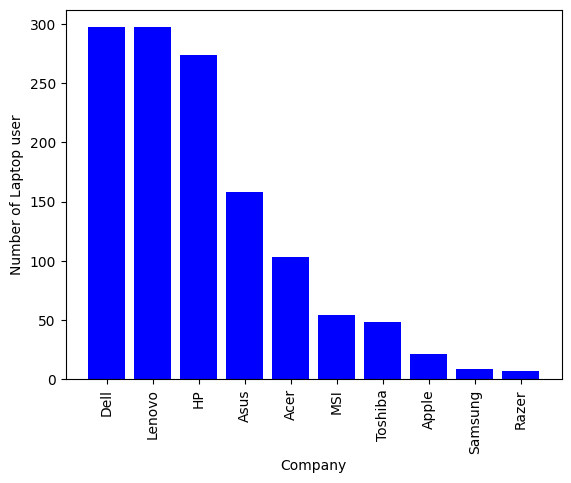

In [7]:
#EDA  
company = []
user_frequency = []
c = Counter()
dfComp = df['Company']
for freq in dfComp:
    c.update(freq.split('\n'))
for item in c.most_common(10):
    company.append(item[0])
    user_frequency.append(item[1])
plt.bar(company,user_frequency,color='b')
plt.ylabel('Number of Laptop user')
plt.xlabel('Company')
plt.style.use('ggplot')
plt.xticks(rotation='vertical')
plt.show()

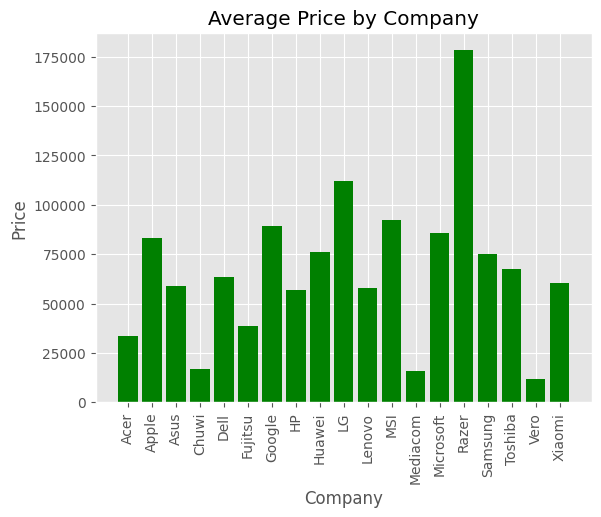

In [8]:
#Average price for each coompany
grouped_data = df.groupby('Company')['Price'].mean()
# print(grouped_data)
plt.bar(grouped_data.index, grouped_data.values,color='g')
plt.title('Average Price by Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

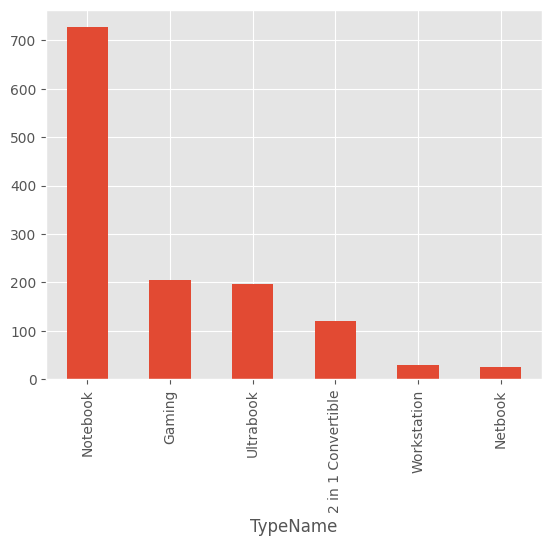

In [9]:
df['TypeName'].value_counts().plot(kind = 'bar')

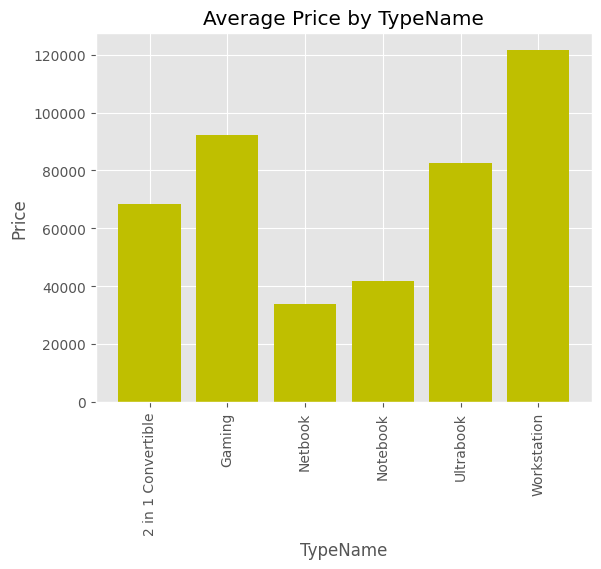

In [10]:
grouped_data = df.groupby('TypeName')['Price'].mean()
# print(grouped_data)
plt.bar(grouped_data.index, grouped_data.values,color='y')
plt.title('Average Price by TypeName')
plt.xlabel('TypeName')
plt.ylabel('Price')
plt.xticks(rotation='vertical')
plt.show()

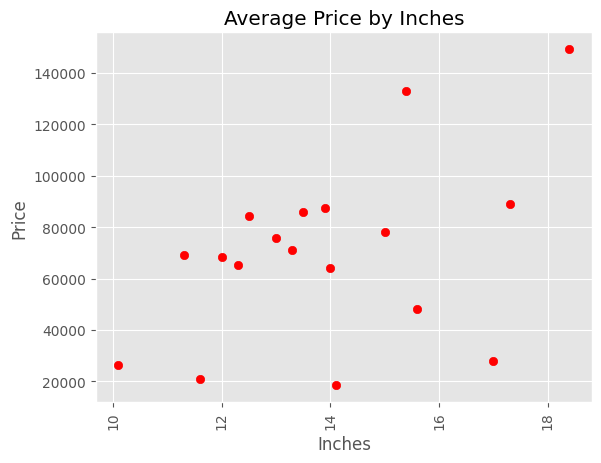

In [11]:
grouped_data = df.groupby('Inches')['Price'].mean()
# print(grouped_data)
plt.scatter(grouped_data.index, grouped_data.values,color='r',marker='o')
plt.title('Average Price by Inches')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.xticks(rotation='vertical')
plt.show()

In [12]:
# df['ScreenResolution'].value_counts()
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# print(df.head())

In [13]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
# print(df.head())

In [14]:
#Extracting X and Y resolution
newCol = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = newCol[0] 
df['X_res'] = df['X_res'].str.extract('(\d+)')
df['Y_res'] = newCol[1]
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')
print(df['X_res'])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: int32


In [15]:
df['ppi'] = (((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
 16  ppi               1303 non-null   float64


In [16]:
num_df = df.select_dtypes(include=['int', 'int32', 'int64', 'float32', 'float64'])
corr_matrix = num_df.corr()['Price']
print(corr_matrix)

Unnamed: 0     0.067984
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.083832
Y_res          0.552809
ppi            0.348331
Name: Price, dtype: float64


In [17]:
#removing redundant columns
df.drop(columns=['Inches','ScreenResolution','X_res','Y_res'],inplace=True)

In [18]:
# df['Cpu'].value_counts()
df['Cpu'].apply(lambda x:x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [19]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) 
df.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [20]:
def processor_fetcher(text):
    if text == "Intel Core i3" or text == "Intel Core i5" or text == "Intel Core i7":
        return text
    else: 
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

df["CPU brand"] = df["Cpu Name"].apply(processor_fetcher)
df.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,CPU brand
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU brand'>

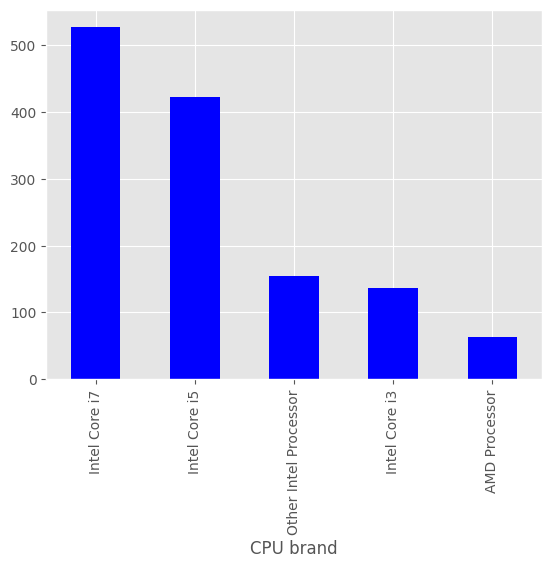

In [21]:
df['CPU brand'].value_counts().plot(kind='bar',color='b')

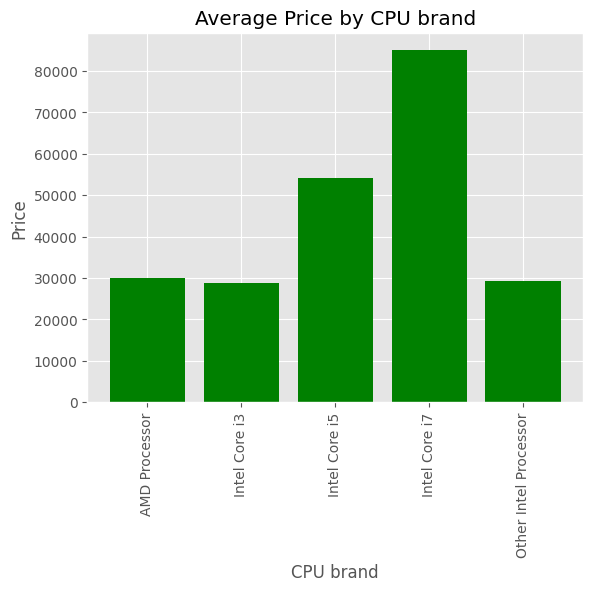

In [22]:
grouped_data = df.groupby('CPU brand')['Price'].mean()
plt.bar(grouped_data.index, grouped_data.values,color='g')
plt.title('Average Price by CPU brand')
plt.xlabel('CPU brand')
plt.ylabel('Price')
plt.xticks(rotation='vertical')
plt.show()

In [23]:
#removing redundant columns
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [24]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
new_col = []
for val in df['first']:
    new_val = ''.join(filter(str.isdigit, val))
    new_col.append(new_val)
df['first'] = new_col

df["second"].fillna("0", inplace = True)

In [25]:
df.head()

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,1,0,0
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,1
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,1,0,0
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,1,0,0
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,1,0,0


In [26]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

new_col2 = []
for val in df['second']:
    new_val = ''.join(filter(str.isdigit, val))
    new_col2.append(new_val)
df['second'] = new_col2

df["first"] = df["first"].astype('int32')
df["second"] = df["second"].astype('int32')

In [27]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [28]:
df.drop(columns='Memory',inplace=True)

In [29]:
df.head()

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU brand,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [30]:
num_df = df.select_dtypes(include=['int', 'int32', 'int64', 'float32', 'float64'])
corr_matrix = num_df.corr()['Price']
print(corr_matrix)

Unnamed: 0       0.067984
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.348331
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [31]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [32]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df = df[df['Gpu brand'] != 'ARM']
df.drop(columns=['Gpu'],inplace=True)

<Axes: xlabel='Gpu brand'>

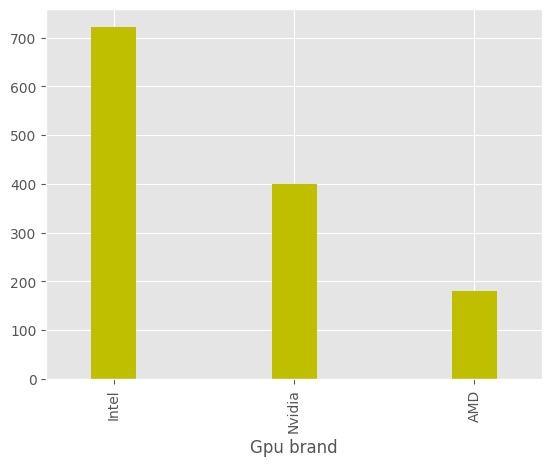

In [51]:
df['Gpu brand'].value_counts().plot(kind='bar',color='y',width=0.25)

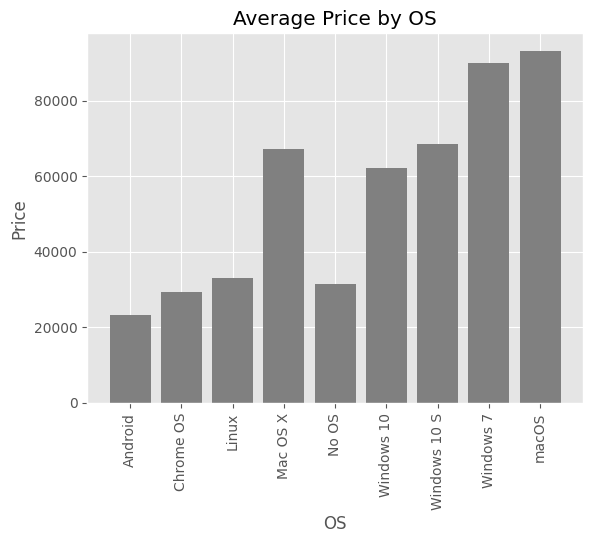

In [34]:
grouped_data = df.groupby('OpSys')['Price'].mean()
plt.bar(grouped_data.index, grouped_data.values,color='#808080')
plt.title('Average Price by OS')
plt.xlabel('OS')
plt.ylabel('Price')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='OpSys'>

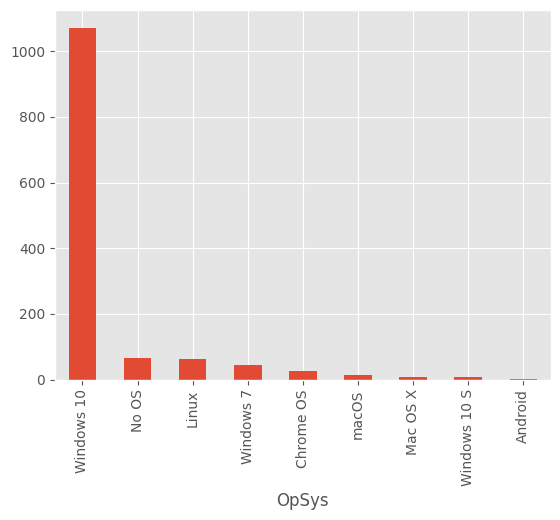

In [35]:
df['OpSys'].value_counts().plot(kind='bar')

In [36]:
def OS_category(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['OS'] = df['OpSys'].apply(OS_category)

In [37]:
#removind Opsys column
df.drop(columns=['OpSys','Unnamed: 0'],inplace=True)

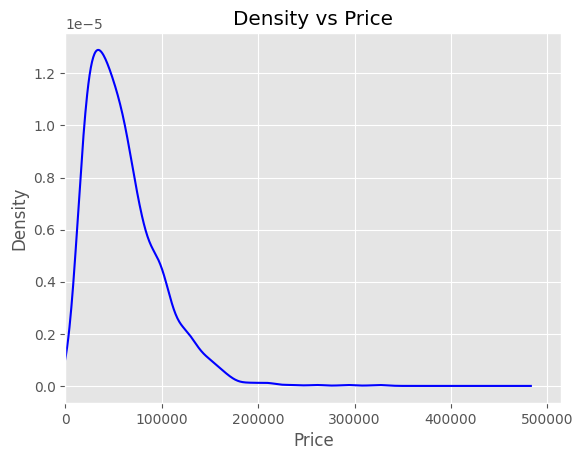

In [38]:
#Target analysis
df['Price'].plot(kind='density',color='blue')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density vs Price')
plt.xlim((0,None))
plt.show()

In [39]:
y = np.log(df['Price'])
X = df.drop(columns=['Price'])

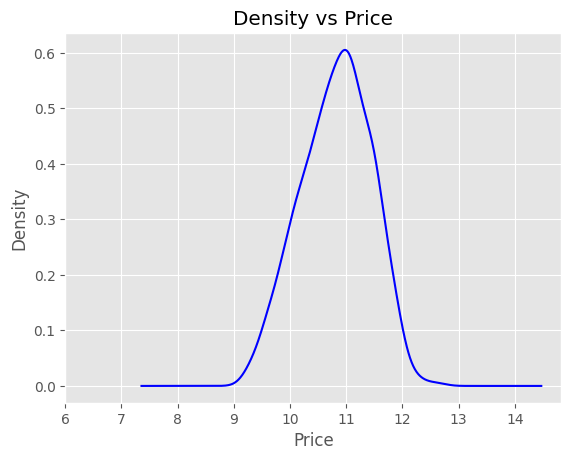

In [40]:
np.log(df['Price']).plot(kind='density',color='blue')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density vs Price')
plt.xlim((6,None))
plt.show()

# Price Prediction

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [60]:
print(X_train)

      Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi   
183   Toshiba            Notebook    8    2.00            0    0  100.454670  \
1141      MSI              Gaming    8    2.40            0    0  141.211998   
1049     Asus             Netbook    4    1.20            0    0  135.094211   
1020     Dell  2 in 1 Convertible    4    2.08            1    1  141.211998   
878      Dell            Notebook    4    2.18            0    0  141.211998   
...       ...                 ...  ...     ...          ...  ...         ...   
466      Acer            Notebook    4    2.20            0    0  100.454670   
299      Asus           Ultrabook   16    1.63            0    0  141.211998   
493      Acer            Notebook    8    2.20            0    0  100.454670   
527    Lenovo            Notebook    8    2.20            0    0  100.454670   
1193    Apple           Ultrabook    8    0.92            0    1  226.415547   

                  CPU brand   HDD  SSD 

# Linear Regression

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

# 'Weight','Price','Touchscreen','Ips','ppi,'CPU brand','HDD','SDD','Gpu brand','OS'])                                     
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print(np.exp(pipe.predict(pd.DataFrame([['Apple','Ultrabook',16,1.5,1,0,140.5,'Intel Core i7',0,512,'Intel','Mac']],columns=['Company','TypeName','Ram','Weight','Touchscreen','Ips','ppi','CPU brand','HDD','SSD','Gpu brand','OS']))
))

R2 score 0.7862069874164868
MAE 0.2163309022678095
MSE 0.08178675635284949
[108980.96993237]


C:\Users\volde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# KNN

In [65]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print(np.exp(pipe.predict(pd.DataFrame([['Apple','Ultrabook',16,1.5,1,0,140.5,'Intel Core i7',0,512,'Intel','Mac']],columns=['Company','TypeName','Ram','Weight','Touchscreen','Ips','ppi','CPU brand','HDD','SSD','Gpu brand','OS']))
))

R2 score 0.8044768643610405
MAE 0.1927817159601832
MSE 0.0747975944705028
[78350.30172725]


C:\Users\volde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Decision Tree

In [66]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print(np.exp(pipe.predict(pd.DataFrame([['Apple','Ultrabook',16,1.5,1,0,140.5,'Intel Core i7',0,512,'Intel','Mac']],columns=['Company','TypeName','Ram','Weight','Touchscreen','Ips','ppi','CPU brand','HDD','SSD','Gpu brand','OS']))
))

R2 score 0.8417009660148496
MAE 0.1819019028442893
MSE 0.06055747270214262
[72431.07684035]


C:\Users\volde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
